# Data Loading

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.width',None)

In [2]:
hh_demographic = pd.read_csv(r"C:\Users\abhij\OneDrive\Desktop\Final_Project\CSV\hh_demographic.csv")
transaction_data = pd.read_csv(r"C:\Users\abhij\OneDrive\Desktop\Final_Project\CSV\transaction_data.csv")

# EDA

## Checking Data info Null Values

In [3]:
transaction_data.isnull().sum()

household_key        0
BASKET_ID            0
DAY                  0
PRODUCT_ID           0
QUANTITY             0
SALES_VALUE          0
STORE_ID             0
RETAIL_DISC          0
TRANS_TIME           0
WEEK_NO              0
COUPON_DISC          0
COUPON_MATCH_DISC    0
dtype: int64

In [4]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2595732 entries, 0 to 2595731
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   household_key      int64  
 1   BASKET_ID          int64  
 2   DAY                int64  
 3   PRODUCT_ID         int64  
 4   QUANTITY           int64  
 5   SALES_VALUE        float64
 6   STORE_ID           int64  
 7   RETAIL_DISC        float64
 8   TRANS_TIME         int64  
 9   WEEK_NO            int64  
 10  COUPON_DISC        float64
 11  COUPON_MATCH_DISC  float64
dtypes: float64(4), int64(8)
memory usage: 237.6 MB


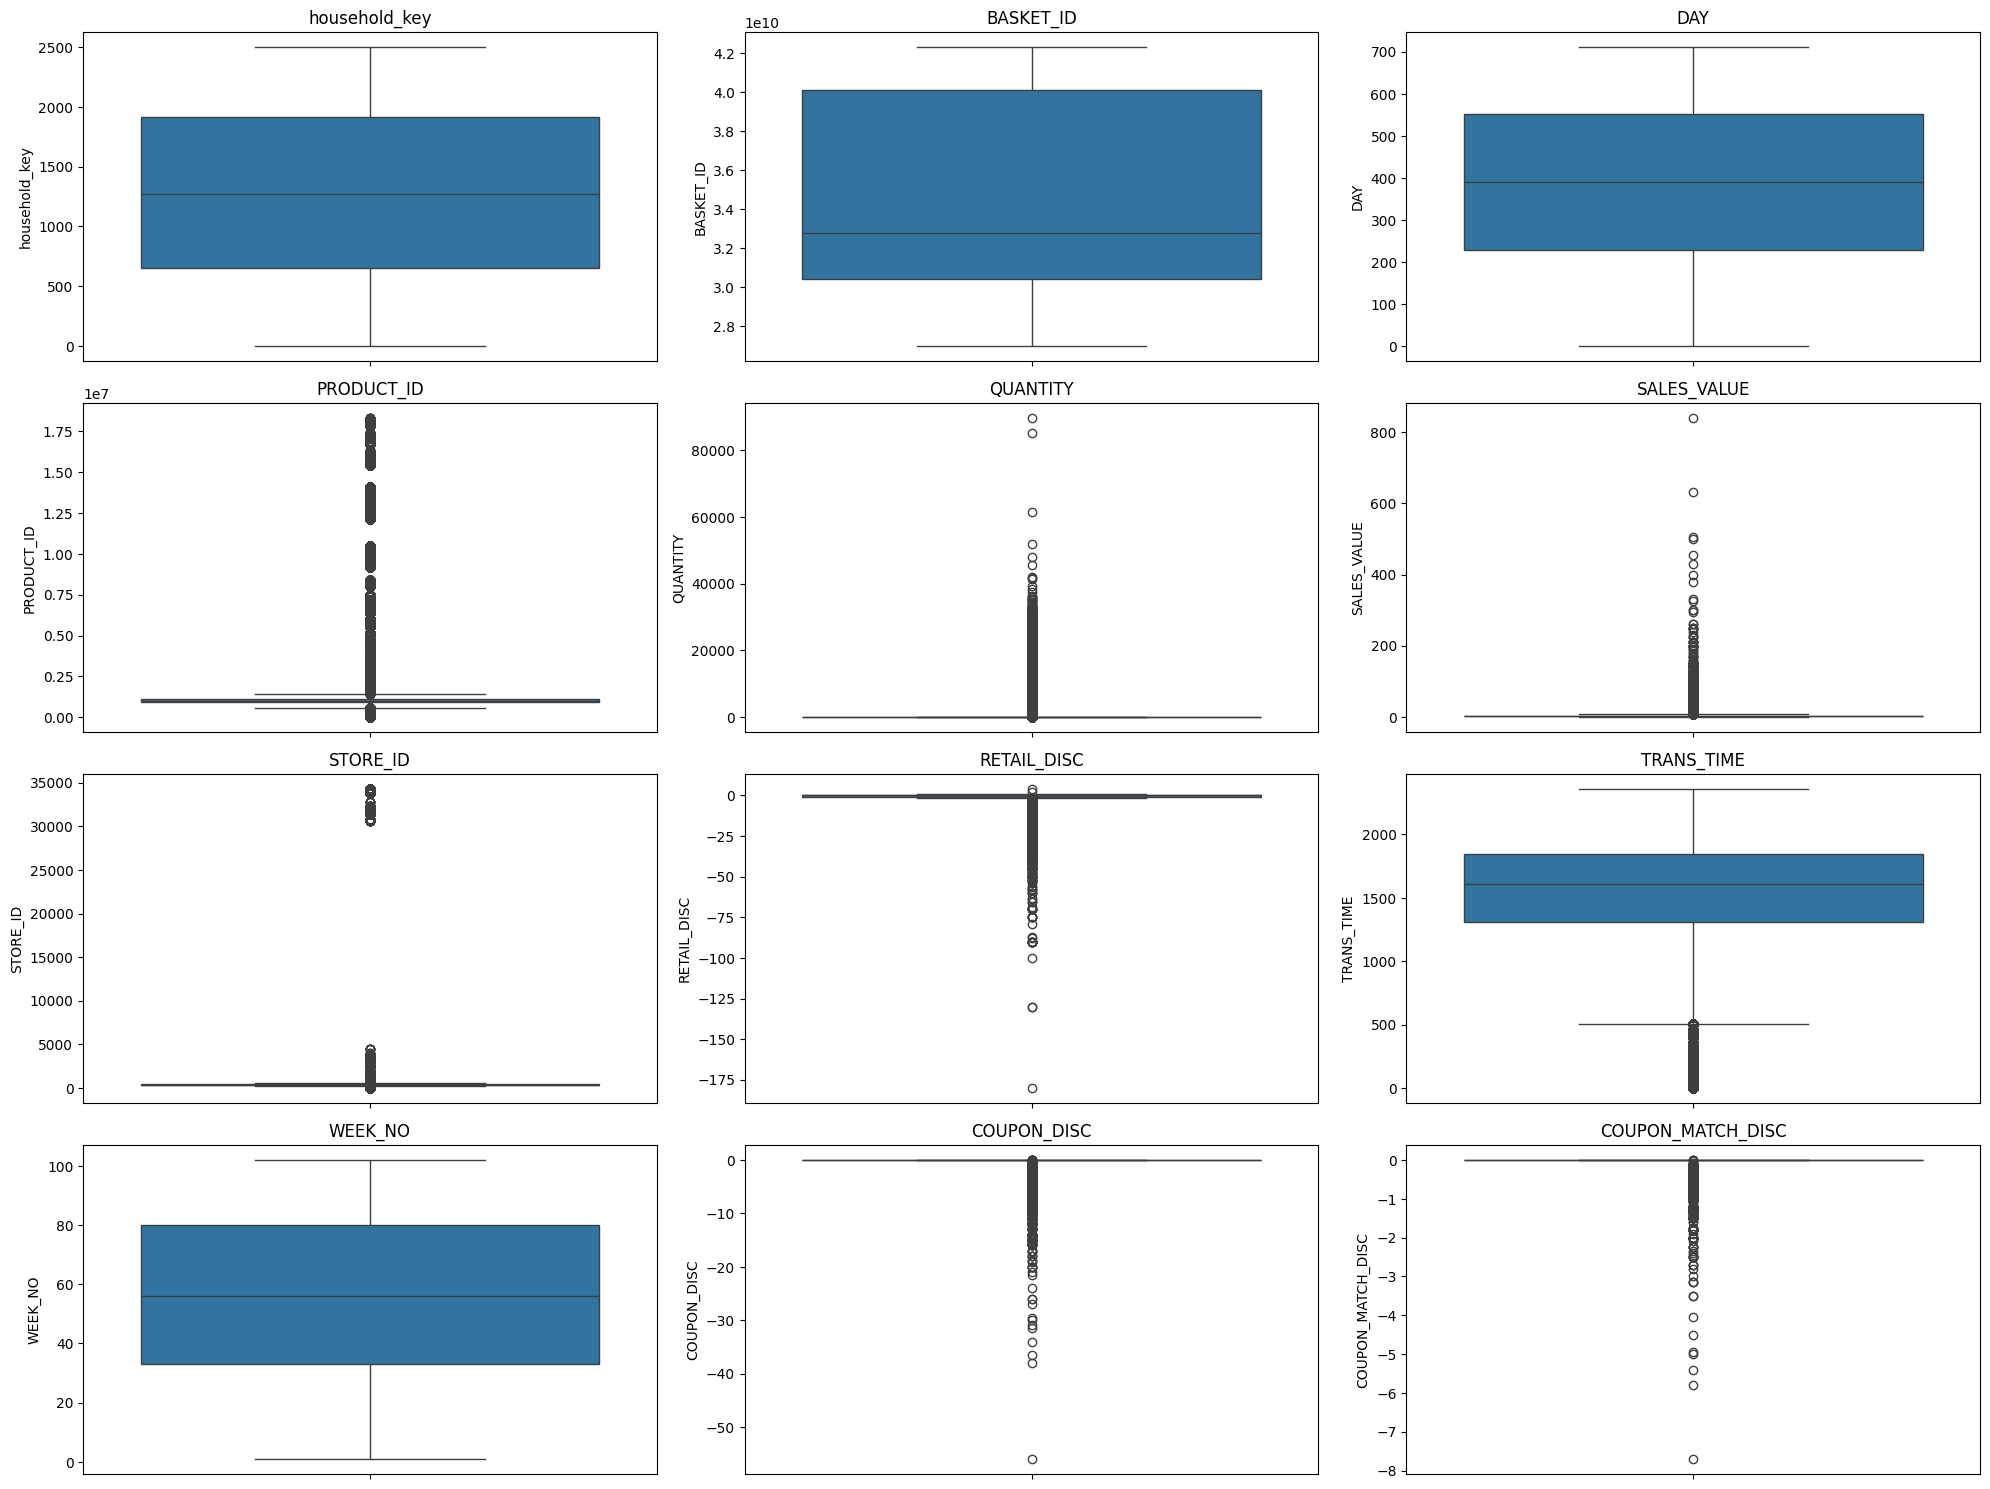

In [5]:
# Set the figure size
plt.figure(figsize=(20, 15))

# Create boxplots for each column
for i, column in enumerate(transaction_data.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=transaction_data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

## Imputing Outliers

In [6]:
def impute_outliers(df):
    # Loop through each column in the dataframe
    for column in df.columns:
        # Calculate the Q1 and Q3 quantiles
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate the lower and upper bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Impute the outliers
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

    return df

# Apply the function to your dataframe
transaction_data = impute_outliers(transaction_data)

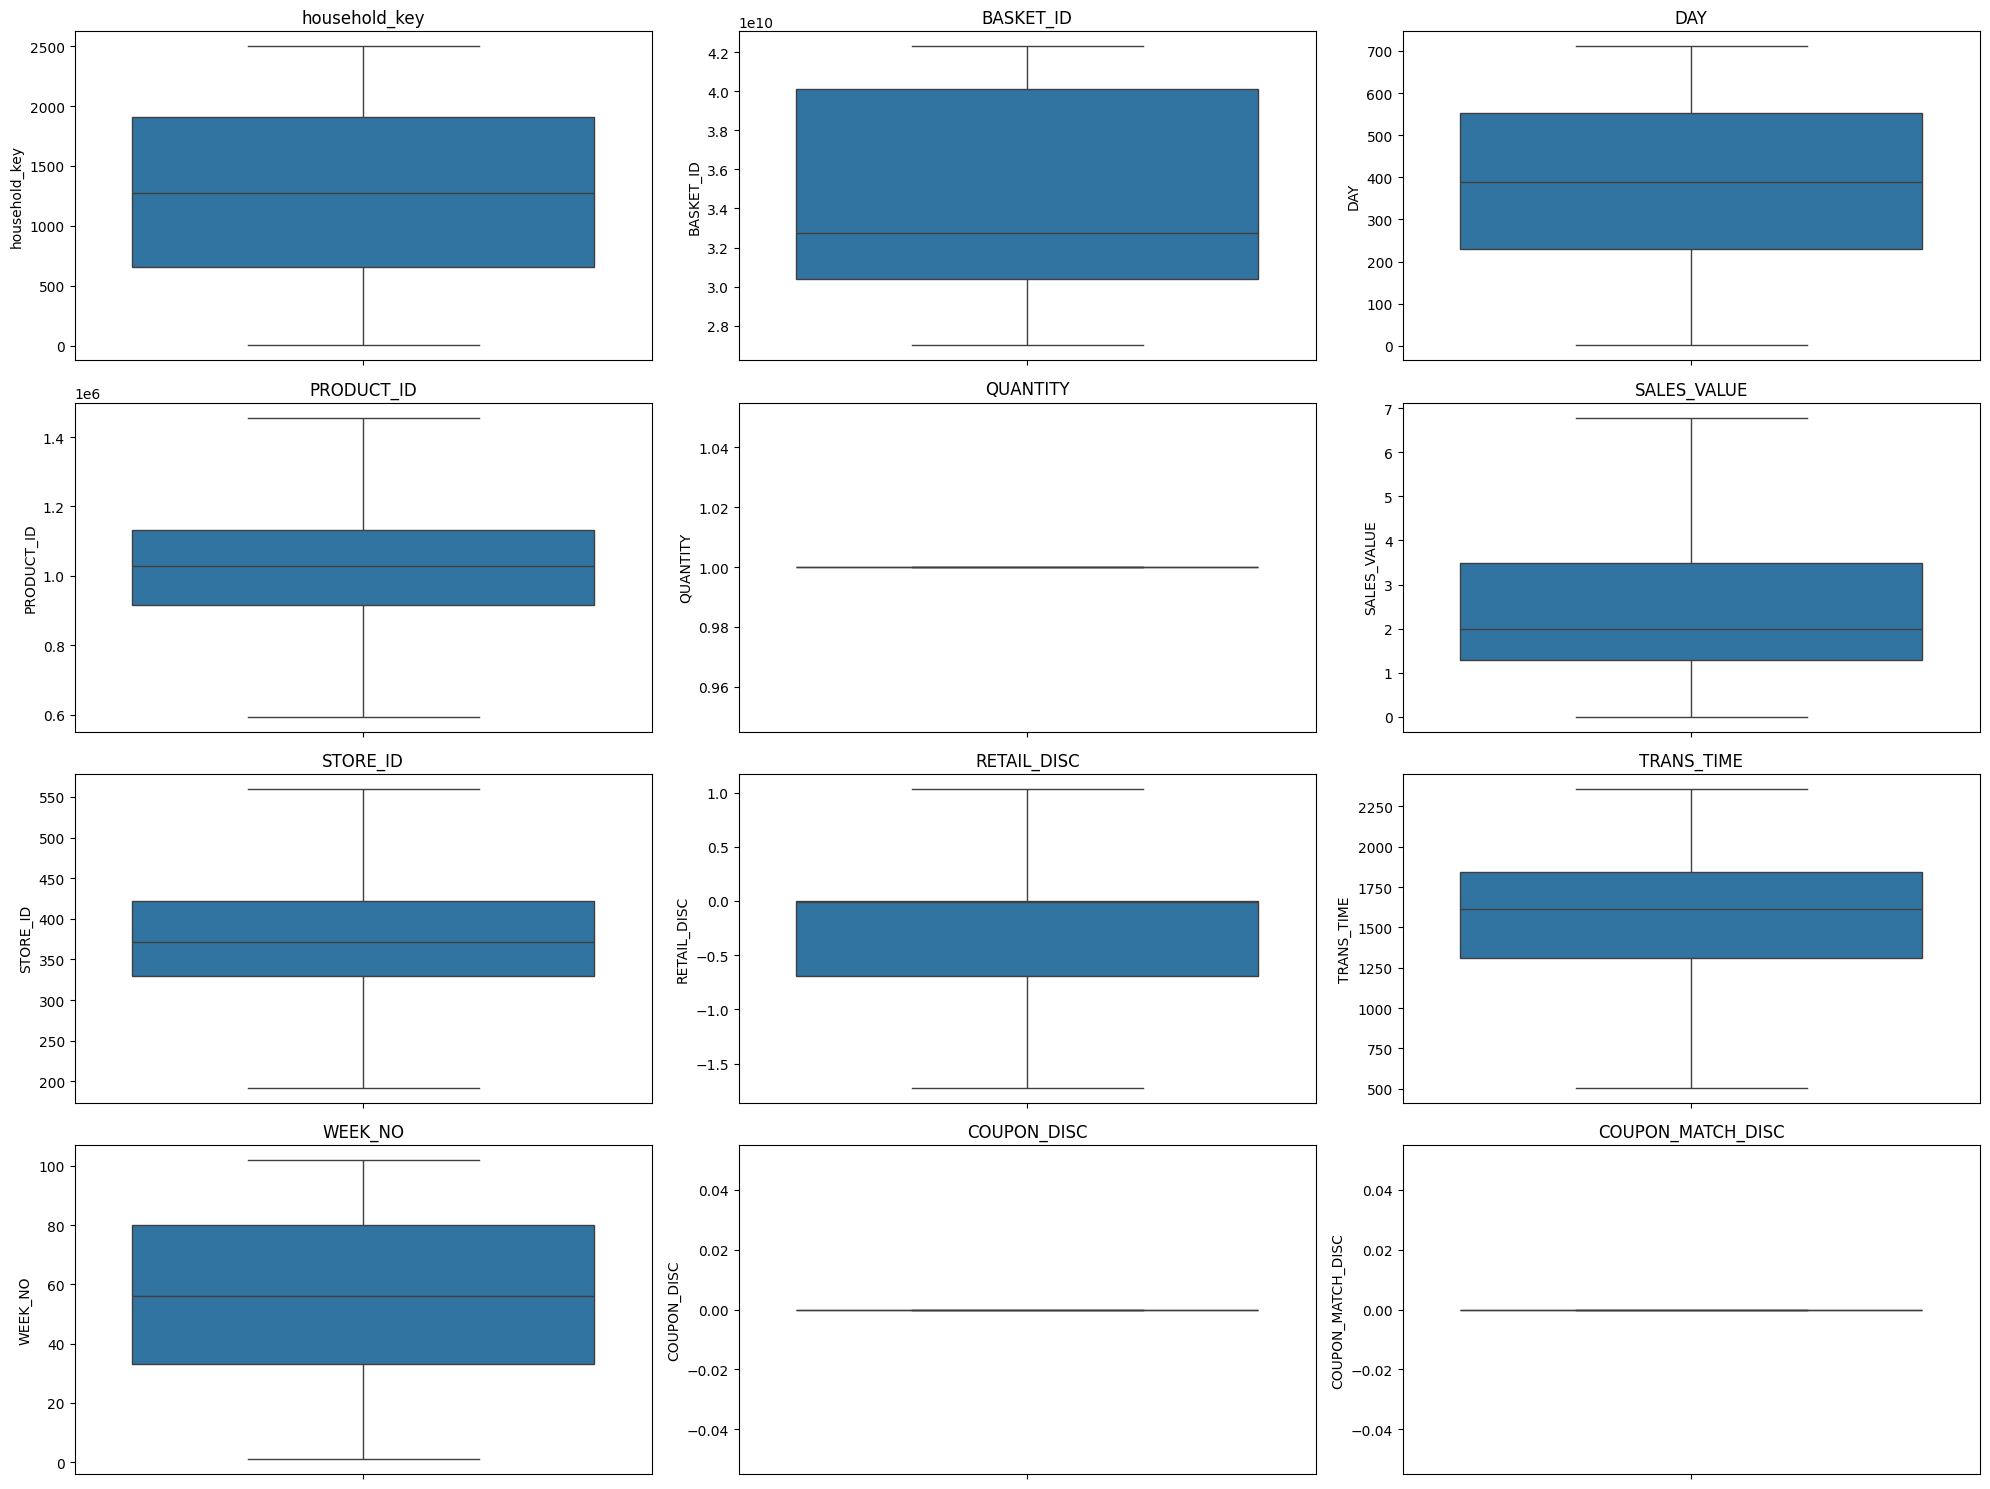

In [7]:
# Set the figure size
plt.figure(figsize=(20, 15))

# Create boxplots for each column
for i, column in enumerate(transaction_data.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(y=transaction_data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [8]:
hh_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AGE_DESC             801 non-null    object
 1   MARITAL_STATUS_CODE  801 non-null    object
 2   INCOME_DESC          801 non-null    object
 3   HOMEOWNER_DESC       801 non-null    object
 4   HH_COMP_DESC         801 non-null    object
 5   HOUSEHOLD_SIZE_DESC  801 non-null    object
 6   KID_CATEGORY_DESC    801 non-null    object
 7   household_key        801 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 50.2+ KB


In [9]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

def encode_categorical_columns(df):
    # Create a LabelEncoder object
    label_encoder = LabelEncoder()

    # Loop through each column in the DataFrame
    for column in df.columns:
        if df[column].dtype == 'object':  # Check if the column is categorical
            df[column] = label_encoder.fit_transform(df[column])

    return df

# Apply the function to your DataFrame
encoded_df = encode_categorical_columns(hh_demographic)

In [10]:
hh_demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   AGE_DESC             801 non-null    int32
 1   MARITAL_STATUS_CODE  801 non-null    int32
 2   INCOME_DESC          801 non-null    int32
 3   HOMEOWNER_DESC       801 non-null    int32
 4   HH_COMP_DESC         801 non-null    int32
 5   HOUSEHOLD_SIZE_DESC  801 non-null    int32
 6   KID_CATEGORY_DESC    801 non-null    int32
 7   household_key        801 non-null    int64
dtypes: int32(7), int64(1)
memory usage: 28.3 KB


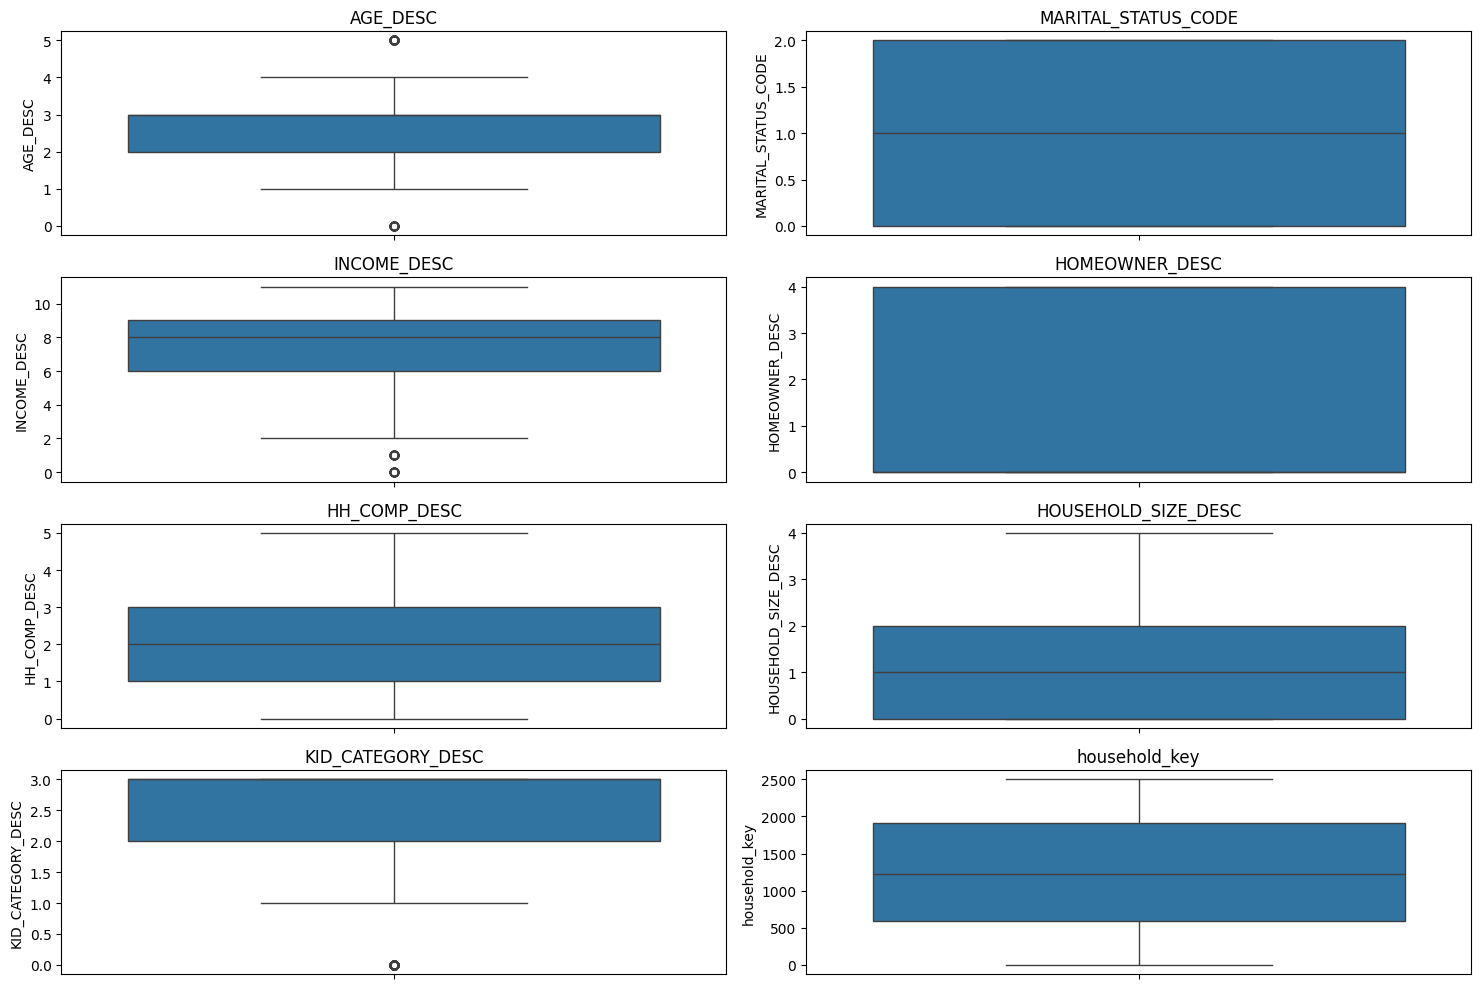

In [11]:
# Box Plot
plt.figure(figsize=(15, 10))

# Loop through each column in the DataFrame
for i, column in enumerate(hh_demographic.columns, 1):
    plt.subplot(4, 2, i)  # Adjust the grid size based on the number of plots
    sns.boxplot(y=hh_demographic[column])
    plt.title(column)

plt.tight_layout()
plt.show()

In [12]:
hh_demographic = impute_outliers(hh_demographic)

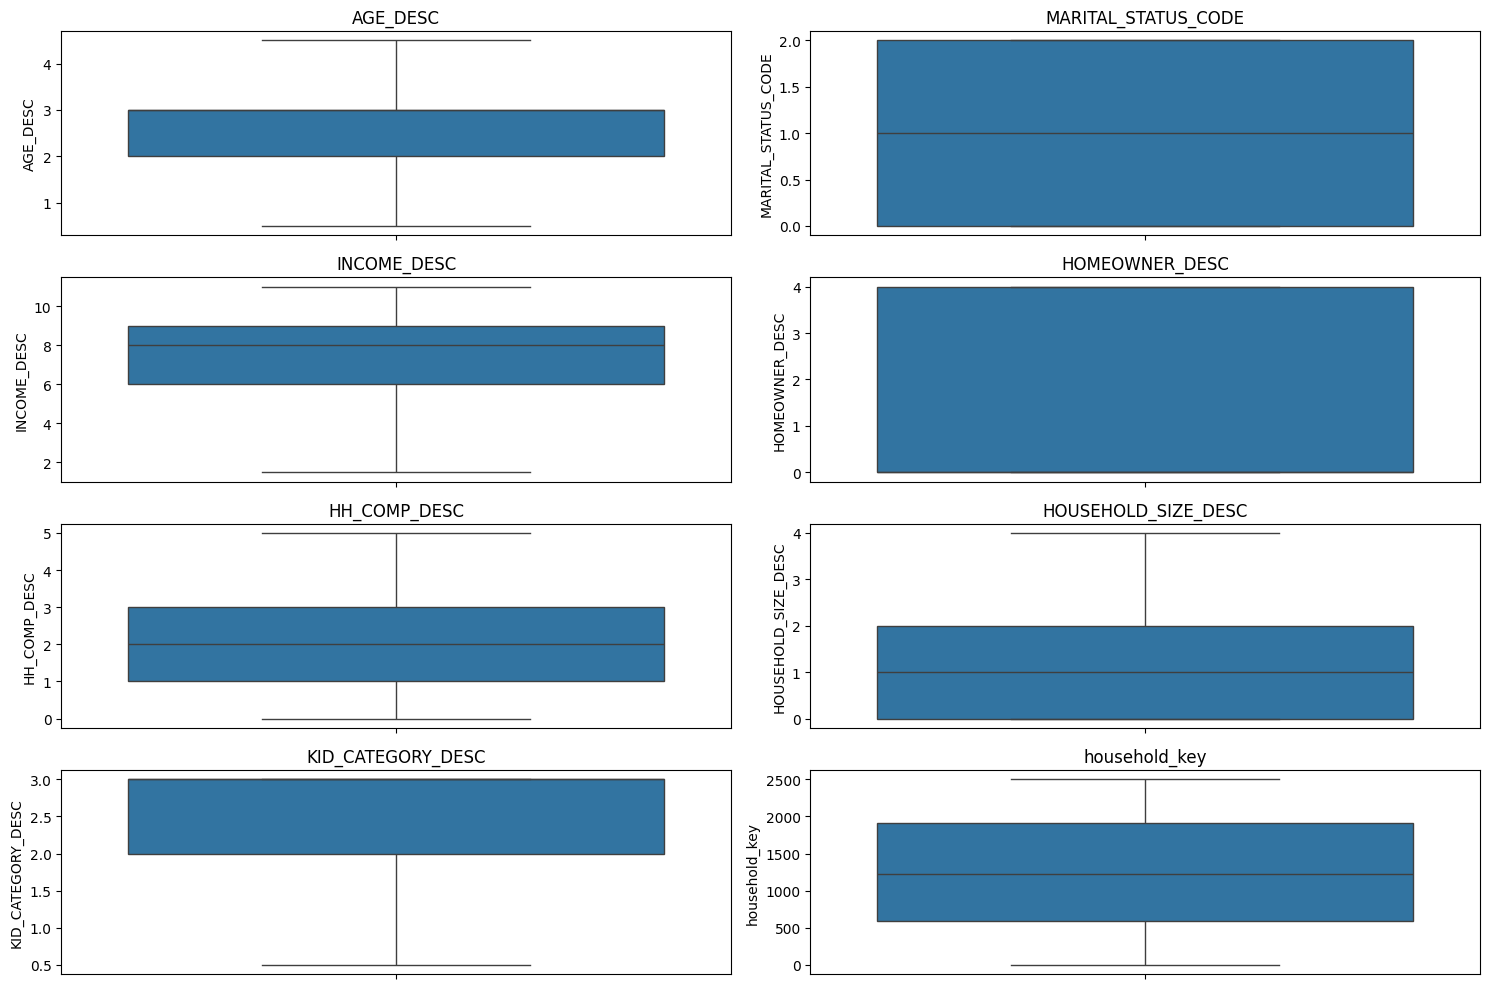

In [13]:
# Set the figure size
plt.figure(figsize=(15, 10))

# Loop through each column in the DataFrame
for i, column in enumerate(hh_demographic.columns, 1):
    plt.subplot(4, 2, i)  # Adjust the grid size based on the number of plots
    sns.boxplot(y=hh_demographic[column])
    plt.title(column)

plt.tight_layout()
plt.show()

## Merged the Data

In [14]:
merged_data = pd.merge(transaction_data, hh_demographic, on='household_key')

In [15]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1427303 entries, 0 to 1427302
Data columns (total 19 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   household_key        1427303 non-null  float64
 1   BASKET_ID            1427303 non-null  float64
 2   DAY                  1427303 non-null  float64
 3   PRODUCT_ID           1427303 non-null  float64
 4   QUANTITY             1427303 non-null  float64
 5   SALES_VALUE          1427303 non-null  float64
 6   STORE_ID             1427303 non-null  float64
 7   RETAIL_DISC          1427303 non-null  float64
 8   TRANS_TIME           1427303 non-null  float64
 9   WEEK_NO              1427303 non-null  float64
 10  COUPON_DISC          1427303 non-null  float64
 11  COUPON_MATCH_DISC    1427303 non-null  float64
 12  AGE_DESC             1427303 non-null  float64
 13  MARITAL_STATUS_CODE  1427303 non-null  float64
 14  INCOME_DESC          1427303 non-null  float64
 15

In [16]:
merged_data.isnull().sum()

household_key          0
BASKET_ID              0
DAY                    0
PRODUCT_ID             0
QUANTITY               0
SALES_VALUE            0
STORE_ID               0
RETAIL_DISC            0
TRANS_TIME             0
WEEK_NO                0
COUPON_DISC            0
COUPON_MATCH_DISC      0
AGE_DESC               0
MARITAL_STATUS_CODE    0
INCOME_DESC            0
HOMEOWNER_DESC         0
HH_COMP_DESC           0
HOUSEHOLD_SIZE_DESC    0
KID_CATEGORY_DESC      0
dtype: int64

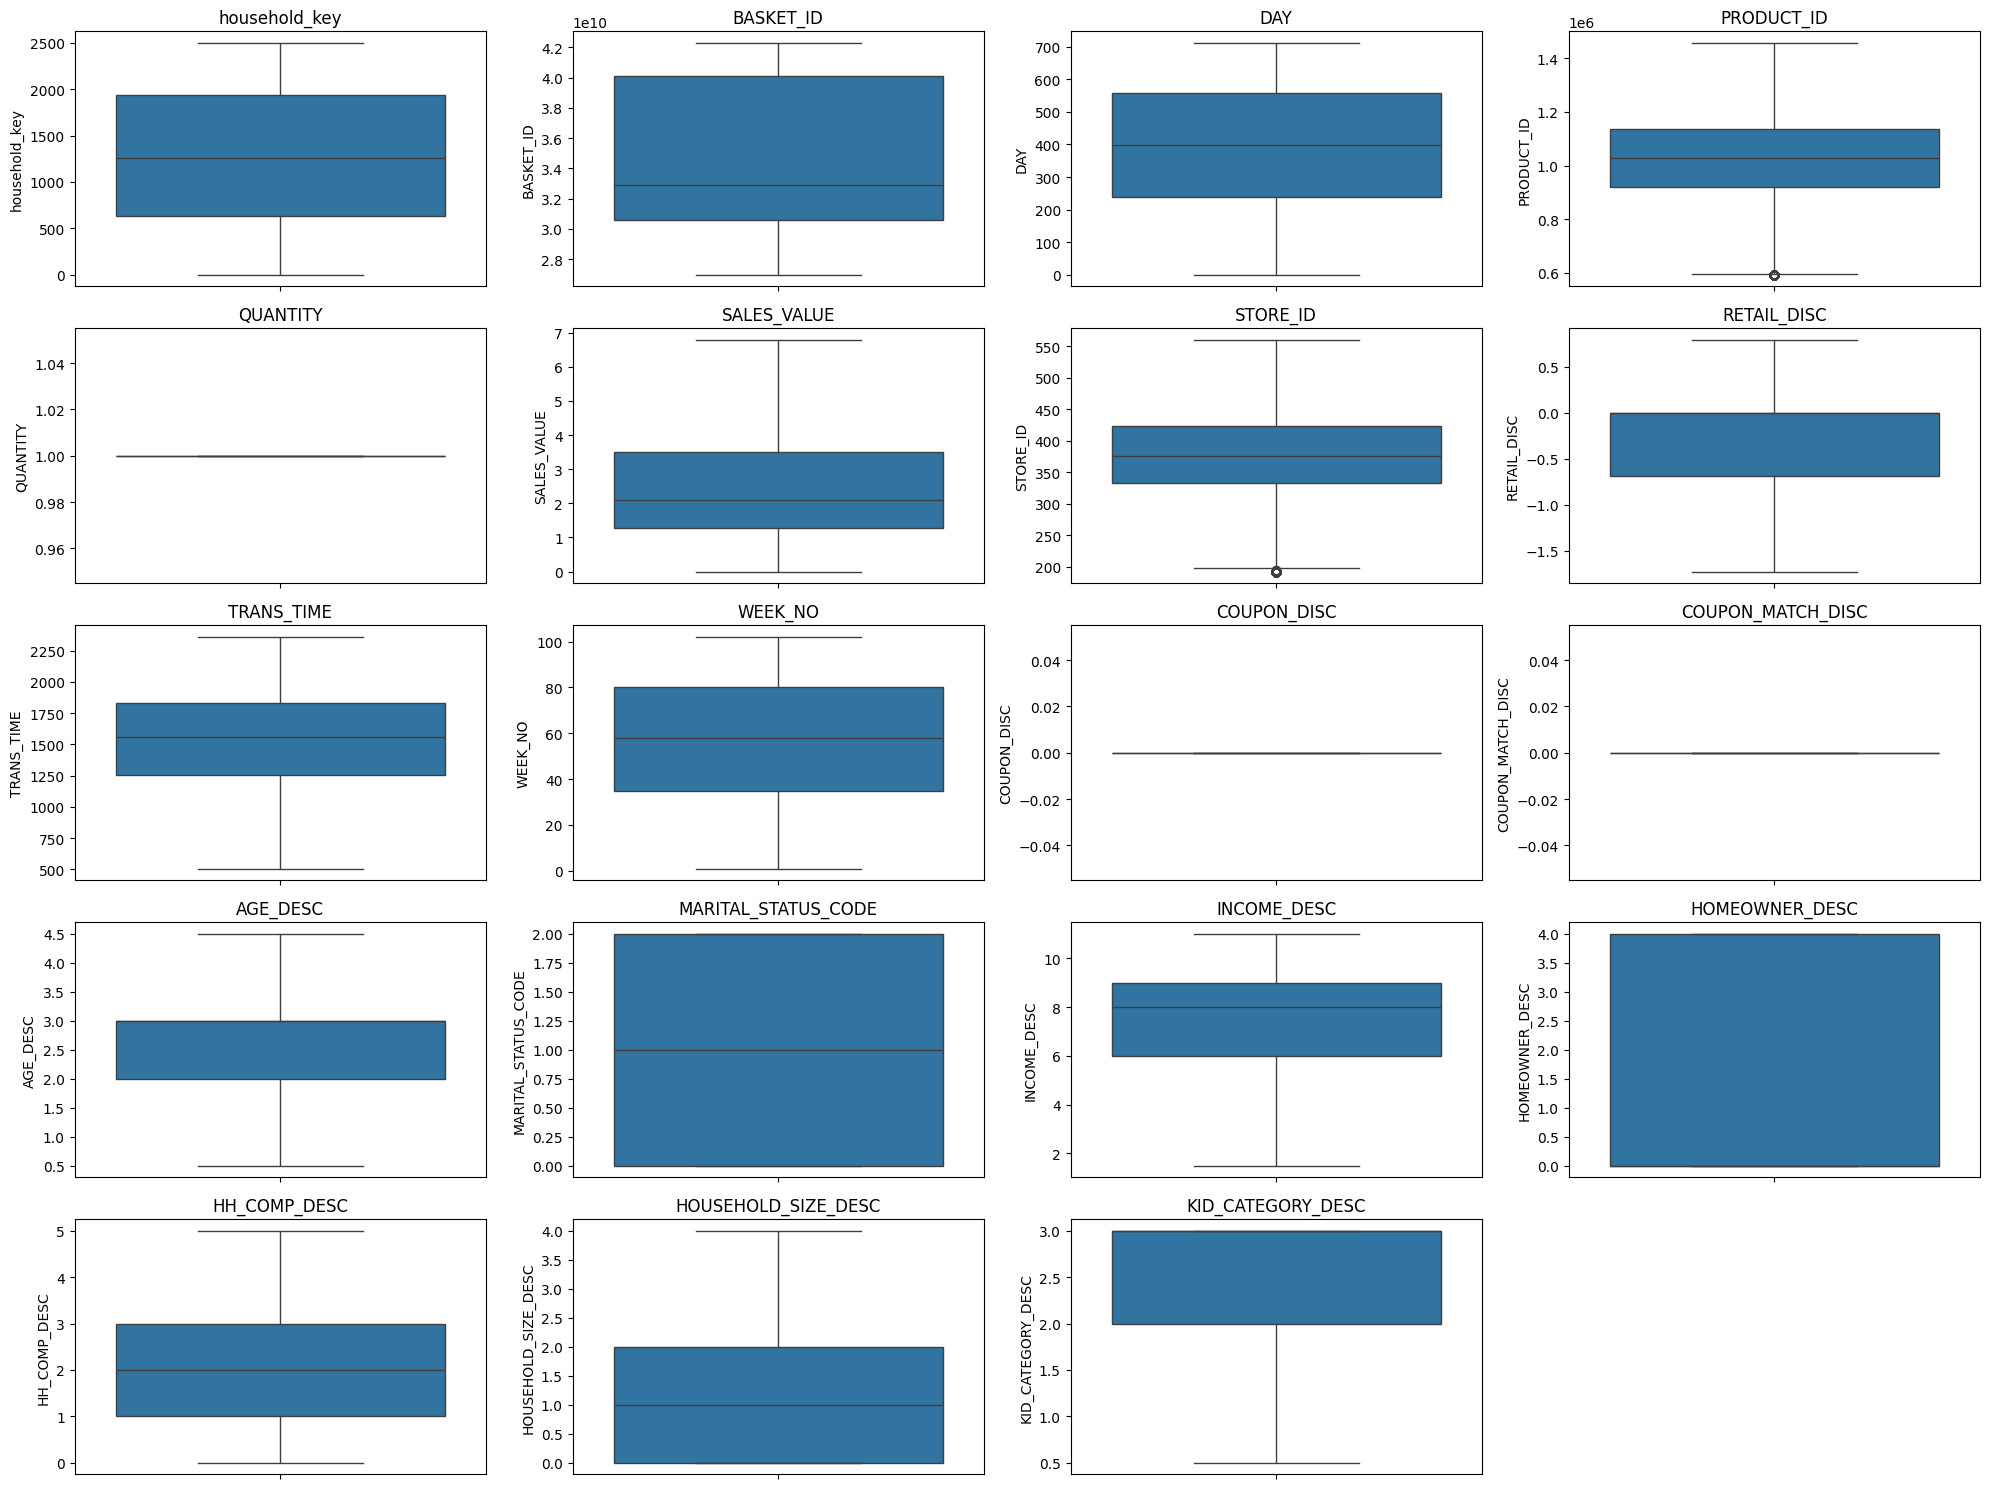

In [17]:
# Set the figure size
plt.figure(figsize=(20, 15))

# Loop through each column in the DataFrame
for i, column in enumerate(merged_data.columns, 1):
    plt.subplot(5, 4, i)  # Adjust the grid size based on the number of columns
    sns.boxplot(y=merged_data[column])
    plt.title(column)

plt.tight_layout()
plt.show()

## Aggregation

In [18]:
features = merged_data.groupby('household_key').agg({
    'SALES_VALUE': 'sum',
    'QUANTITY': 'sum',
    'COUPON_DISC': 'sum',
    'COUPON_MATCH_DISC': 'sum',
    'DAY': 'mean',
    'TRANS_TIME': 'mean',
    # Add more features as needed
}).reset_index()

features = pd.merge(features, hh_demographic, on='household_key')

## StandardScalar

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features.drop('household_key', axis=1))


# K-means Clustering

## Elbow Method

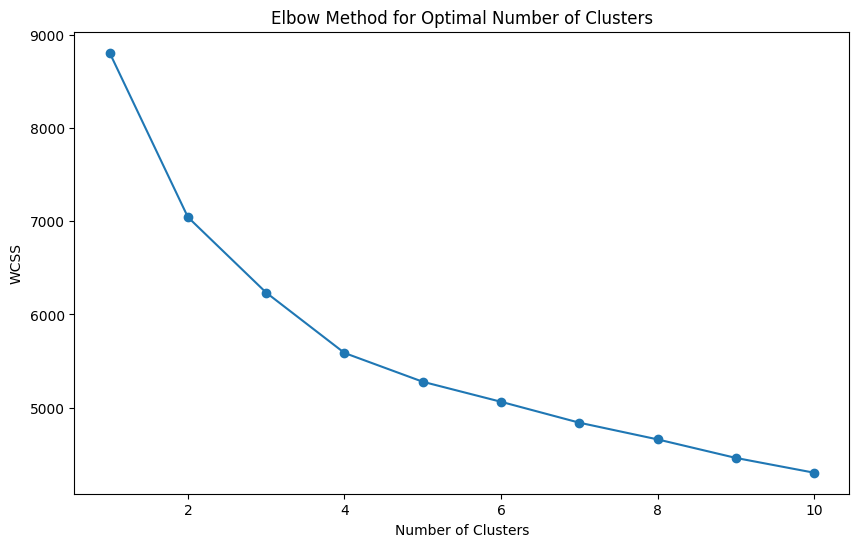

In [20]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [21]:
n_clusters = 4  # Replace with the optimal number of clusters from the elbow method
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
features['Cluster'] = kmeans.fit_predict(scaled_features)

In [22]:
for col in features.columns:
    if col != 'Cluster':
        print(f"\nAnalysis of {col} by Cluster:")
        cluster_analysis = features.groupby('Cluster')[col].mean()
        print(cluster_analysis)


Analysis of household_key by Cluster:
Cluster
0    1397.489130
1    1254.401709
2    1126.143590
3    1241.710714
Name: household_key, dtype: float64

Analysis of SALES_VALUE by Cluster:
Cluster
0    11110.916848
1     3792.625556
2     4093.717077
3     3910.286607
Name: SALES_VALUE, dtype: float64

Analysis of QUANTITY by Cluster:
Cluster
0    4007.630435
1    1410.658120
2    1572.994872
3    1506.332143
Name: QUANTITY, dtype: float64

Analysis of COUPON_DISC by Cluster:
Cluster
0    0.0
1    0.0
2    0.0
3    0.0
Name: COUPON_DISC, dtype: float64

Analysis of COUPON_MATCH_DISC by Cluster:
Cluster
0    0.0
1    0.0
2    0.0
3    0.0
Name: COUPON_MATCH_DISC, dtype: float64

Analysis of DAY by Cluster:
Cluster
0    385.395674
1    398.325795
2    402.570309
3    396.992071
Name: DAY, dtype: float64

Analysis of TRANS_TIME by Cluster:
Cluster
0    1517.959903
1    1512.577992
2    1566.020595
3    1606.204612
Name: TRANS_TIME, dtype: float64

Analysis of AGE_DESC by Cluster:
Cluster
0

### Cluster 0: This cluster shows the highest total SALES_VALUE, indicating that households in this cluster are the most valuable customers, contributing significantly to overall sales. 
###  Cluster 1, 2, and 3: These clusters show significantly lower SALES_VALUE, indicating that households in these clusters spend less on average. They might be more price-sensitive or less engaged, making them potential targets for promotional offers or discounts.


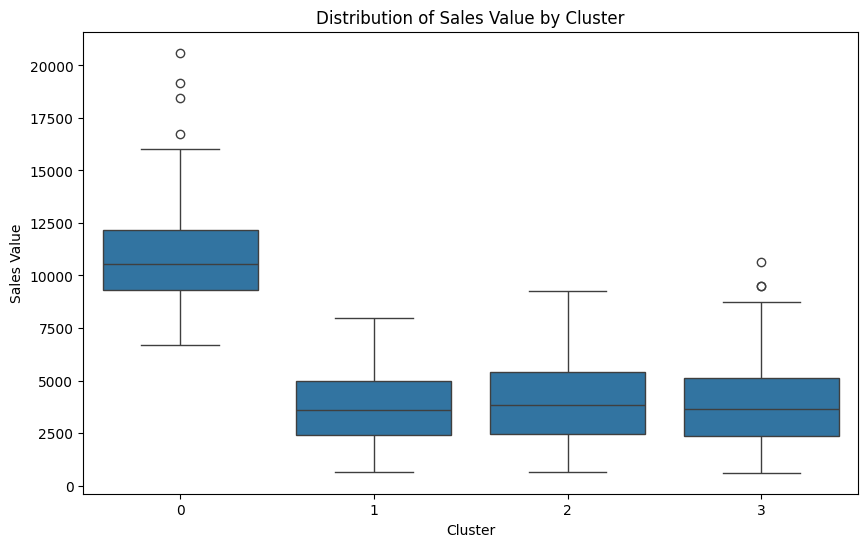

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='SALES_VALUE', data=features)
plt.title('Distribution of Sales Value by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Sales Value')
plt.show()

# PCA

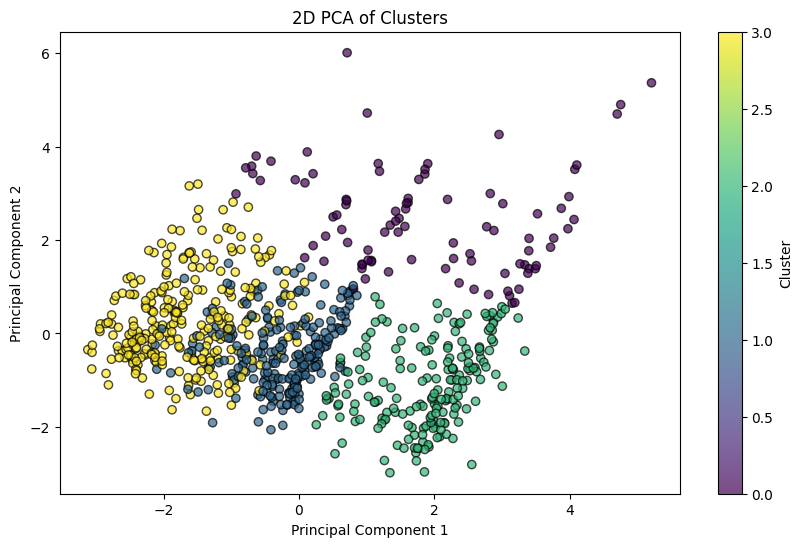

In [24]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = features['Cluster']

plt.figure(figsize=(10, 6))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', alpha=0.7, edgecolors='k')
plt.colorbar(scatter, label='Cluster')
plt.title('2D PCA of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


### Cluster Distinction:

The clusters are relatively distinct in the 2D space, which suggests that the features used in clustering are effective at separating different customer segments.
The majority of points within each cluster are grouped closely together, indicating that there is a significant degree of similarity among customers within the same cluster.

Cluster Overlap:

There is some overlap between clusters, particularly between the dark purple and blue clusters. This overlap might suggest that these two groups of customers have some similarities, possibly requiring further analysis to distinguish them better or to refine the clustering algoritm.

Size and Density of Clusters:

The yellow cluster appears more spread out compared to the other clusters, indicating more variability within this group. This suggests that the customers in this cluster may have more diverse behaviors or characteristics.
The tighter clusters (e.g., the dark purple cluster) may represent more homogenous customer segments with similar purchasing behaviors or demographic characteristics.

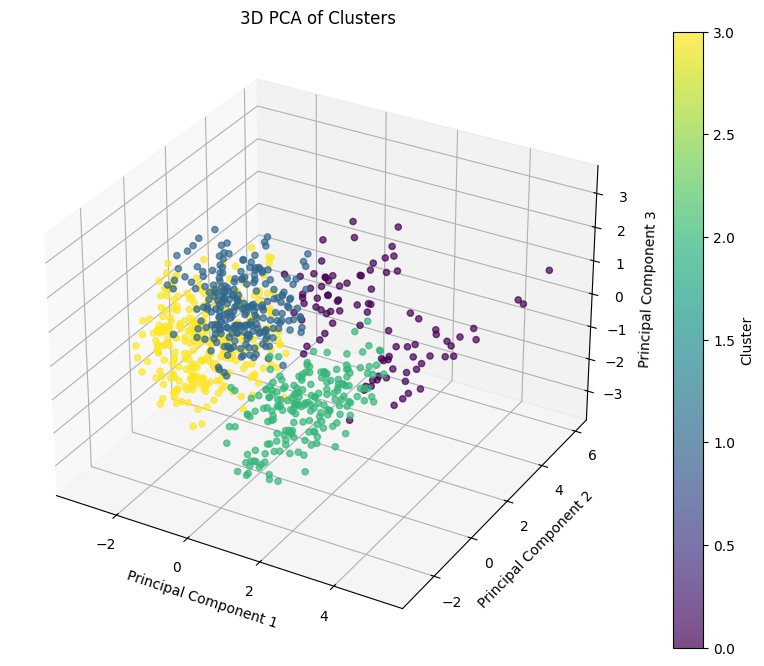

In [25]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(scaled_features)
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2', 'PC3'])
pca_df['Cluster'] = features['Cluster']

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'], c=pca_df['Cluster'], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
ax.set_title('3D PCA of Clusters')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()

### Enhanced Separation:

The addition of the third principal component in the 3D plot slightly enhances the separation between clusters, especially among the yellow and green clusters, which appear more distinct in 3D than in 2D.

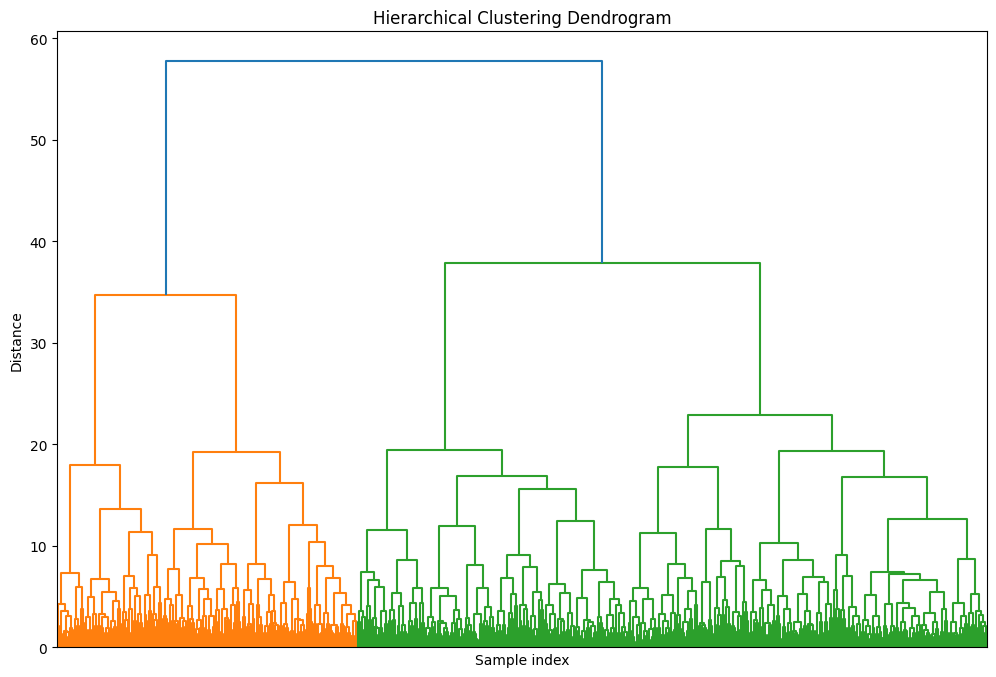

In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(scaled_features, method='ward')
plt.figure(figsize=(12, 8))
dendrogram(linked, orientation='top', no_labels=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()


### Hierarchical Clustering
#### 1)Two distinct customer segments: The dendrogram reveals two primary customer groups, suggesting a fundamental division in the customer base.
#### 2)Multiple segmentation levels: The hierarchical structure allows for flexible segmentation, from broad categories to more granular subgroups.
#### 3)Uneven cluster sizes: The slightly smaller orange cluster indicates an imbalance in the distribution of customers between the two main segments.
#### 4)High within-cluster similarity: Short lower branches suggest strong similarities among closely related customers, especially within subgroups.
#### 5)Complex customer relationships: Dense branching patterns indicate intricate relationships between customers, offering opportunities for nuanced targeting strategies.

# RFM Analysis

In [27]:
current_day = transaction_data['DAY'].max()
rfm = transaction_data.groupby('household_key').agg({
    'DAY': lambda x: current_day - x.max(),
    'BASKET_ID': 'nunique',
    'SALES_VALUE': 'sum'
}).reset_index()
rfm.columns = ['household_key', 'Recency', 'Frequency', 'Monetary']

rfm['R_rank'] = pd.qcut(rfm['Recency'], 5, labels=range(5, 0, -1))
rfm['F_rank'] = pd.qcut(rfm['Frequency'], 5, labels=range(1, 6))
rfm['M_rank'] = pd.qcut(rfm['Monetary'], 5, labels=range(1, 6))

rfm['RFM_Score'] = rfm['R_rank'].astype(str) + rfm['F_rank'].astype(str) + rfm['M_rank'].astype(str)

def segment_customers(rfm):
    if rfm == '555':
        return 'Champions'
    elif rfm[0] == '5' or rfm[1] == '5':
        return 'Loyal Customers'
    elif rfm[0] == '4':
        return 'Potential Loyalists'
    elif rfm[2] == '5':
        return 'Big Spenders'
    elif rfm[0] == '1' and rfm[1] == '1':
        return 'Hibernating'
    else:
        return 'Others'

rfm['Segment'] = rfm['RFM_Score'].apply(segment_customers)
print(rfm.head())

   household_key  Recency  Frequency  Monetary R_rank F_rank M_rank RFM_Score  \
0            1.0      5.0         86   4259.30      3      3      4       334   
1            2.0     43.0         45   1849.04      1      2      3       123   
2            3.0      8.0         47   2446.25      3      2      4       324   
3            4.0     84.0         30    962.29      1      1      2       112   
4            5.0      8.0         40    690.64      3      2      2       322   

       Segment  
0       Others  
1       Others  
2       Others  
3  Hibernating  
4       Others  


### Recency, Frequency, and Monetary Value:

#### Recency: Indicates how recently a customer has made a purchase. Customers with lower Recency values (e.g., 1.0, 8.0) have made recent purchases, while those with higher values (e.g., 43.0, 84.0) have not purchased recently.
#### Frequency: Represents the number of purchases made by a customer. Higher values (e.g., 86) suggest frequent buyers, while lower values (e.g., 30) indicate less frequent purchases.
#### Monetary: Shows the total amount spent by a customer. Higher Monetary values (e.g., 4259.30) indicate higher spenders, while lower values (e.g., 962.29) suggest lower spenders.
#### RFM_Score: Combines Recency, Frequency, and Monetary values into a single score, showing the overall value of each customer. Higher scores (e.g., 334, 324) denote more valuable customers, while lower scores (e.g., 112, 123) indicate less valuable ones.
#### R_rank, F_rank, M_rank: Ranks customers based on Recency, Frequency, and Monetary values, respectively. For example, a customer with R_rank of 3 has a higher Recency value compared to someone with a rank of 1, who has made more recent purchases. Similarly, higher Frequency and Monetary ranks indicate more frequent and higher spending.

In [28]:
merged_data = pd.merge(rfm, hh_demographic, on='household_key', how='inner')
print(merged_data.head())

   household_key  Recency  Frequency  Monetary R_rank F_rank M_rank RFM_Score  \
0            1.0      5.0         86   4259.30      3      3      4       334   
1            7.0      2.0         59   3261.64      4      2      4       424   
2            8.0      5.0        113   5009.40      3      4      5       345   
3           13.0      2.0        275   7836.60      4      5      5       455   
4           16.0     21.0         98   1346.58      2      3      2       232   

               Segment  AGE_DESC  MARITAL_STATUS_CODE  INCOME_DESC  \
0               Others       4.5                  0.0          8.0   
1  Potential Loyalists       3.0                  0.0          9.0   
2         Big Spenders       1.0                  2.0          6.0   
3      Loyal Customers       1.0                  2.0         10.0   
4               Others       3.0                  1.0          9.0   

   HOMEOWNER_DESC  HH_COMP_DESC  HOUSEHOLD_SIZE_DESC  KID_CATEGORY_DESC  
0             0.0 

## Clustering in RFM

In [29]:
features = merged_data.drop(columns=['household_key', 'RFM_Score', 'Segment'])
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(features)
merged_data['Cluster'] = clusters
print(merged_data[['household_key', 'Cluster']].head())

   household_key  Cluster
0            1.0        2
1            7.0        1
2            8.0        2
3           13.0        0
4           16.0        1


In [30]:
merged_data = merged_data.select_dtypes(include=['number'])

In [31]:
for col in hh_demographic.columns:
    if col != 'household_key':
        print(f"Analysis of {col} by Cluster:")
        cluster_analysis = merged_data.groupby('Cluster')[col].value_counts(normalize=True).unstack().fillna(0)
        print(cluster_analysis)
        print("\n")

cluster_profile = merged_data.groupby('Cluster').mean()
print(cluster_profile)


Analysis of AGE_DESC by Cluster:
AGE_DESC       0.5       1.0       2.0       3.0       4.0       4.5
Cluster                                                             
0         0.030534  0.206107  0.297710  0.366412  0.045802  0.053435
1         0.059524  0.181548  0.202381  0.339286  0.086310  0.130952
2         0.075085  0.167235  0.232082  0.378840  0.078498  0.068259
3         0.000000  0.121951  0.463415  0.365854  0.024390  0.024390


Analysis of MARITAL_STATUS_CODE by Cluster:
MARITAL_STATUS_CODE       0.0       1.0       2.0
Cluster                                          
0                    0.473282  0.114504  0.412214
1                    0.389881  0.148810  0.461310
2                    0.419795  0.160410  0.419795
3                    0.585366  0.121951  0.292683


Analysis of INCOME_DESC by Cluster:
INCOME_DESC      1.5       2.0       3.0       4.0       5.0       6.0   \
Cluster                                                                   
0            0.0763

### Cluster Characteristics:
#### Cluster 0:

##### Recency: Customers in this cluster have low recency (4.07), meaning they have purchased recently.
##### Frequency: They make frequent purchases (267.76).
##### Monetary: They spend a high amount on average (8254.58).
##### Demographics: They have a relatively high AGE_DESC and a moderate INCOME_DESC, suggesting older and moderately wealthy customers. The MARITAL_STATUS_CODE, HOMEOWNER_DESC, and other demographic features indicate that this group might have stable lifestyles.

#### Cluster 1:

##### Recency: Customers here have a higher recency (10.79), indicating less recent purchases.
##### Frequency: They have moderate purchase frequency (119.04).
##### Monetary: They spend a moderate amount (2312.49).
##### Demographics: They are slightly younger (AGE_DESC) and have a lower INCOME_DESC compared to Cluster 0. This cluster might include more budget-conscious or younger customers.

#### Cluster 2:

##### Recency: This cluster shows moderate recency (5.98), suggesting recent but less frequent purchases compared to Cluster 0.
##### Frequency: They have a moderate frequency of purchases (172.89).
##### Monetary: Their spending is also moderate (4781.63).
##### Demographics: They are relatively similar to Cluster 0 in terms of age and income but have a higher MARITAL_STATUS_CODE and HOMEOWNER_DESC, indicating a slightly different demographic profile.

#### Cluster 3:

##### Recency: Customers in this cluster have the highest recency (1.41), meaning they haven't purchased recently.
##### Frequency: They have a low frequency of purchases (356.24).
##### Monetary: They spend the most on average (13255.36).
##### Demographics: They have lower AGE_DESC and INCOME_DESC values, suggesting that they might be younger with lower income but spend a lot when they do purchase.

# Marketing Stratergy

In [32]:
def marketing_strategy(cluster):
    if cluster == 0:
        return "Targeted Discount"
    elif cluster == 1:
        return "Loyalty Program"
    elif cluster == 2:
        return "New Product Recommendation"
    elif cluster == 3:
        return "Re-engagement Campaign"
    else:
        return "General Offer"

merged_data['Marketing_Strategy'] = merged_data['Cluster'].apply(marketing_strategy)
print(merged_data[['household_key', 'Cluster', 'Marketing_Strategy']].head())


   household_key  Cluster          Marketing_Strategy
0            1.0        2  New Product Recommendation
1            7.0        1             Loyalty Program
2            8.0        2  New Product Recommendation
3           13.0        0           Targeted Discount
4           16.0        1             Loyalty Program


In [33]:
merged_data['Marketing_Strategy'].value_counts()

Marketing_Strategy
Loyalty Program               336
New Product Recommendation    293
Targeted Discount             131
Re-engagement Campaign         41
Name: count, dtype: int64

### Distribution of Marketing Strategies:

#### Loyalty Program: Most frequently assigned (336 customers). This suggests that a large portion of your customers belong to Cluster 1, which is ideal for a loyalty program.
#### New Product Recommendation: The second most common strategy (293 customers). This implies a significant number of customers are in Cluster 2, who would benefit from new product suggestions.
#### Targeted Discount: Applied to 131 customers. This is for Cluster 0, which, while substantial, is less than the first two clusters.
#### Re-engagement Campaign: Least common (41 customers). This indicates that the number of customers in Cluster 3 is relatively small.

# Churn Prediction

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from scipy.stats import randint, uniform

In [35]:

# Step 1: Create target variable 'Churn'
churn_data = features.copy()
churn_data['Churn'] = (churn_data['Recency'] > 30).astype(int)

# Define features and target
X = churn_data.drop(['Churn'], axis=1)
y = churn_data['Churn']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [36]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Recency              801 non-null    float64 
 1   Frequency            801 non-null    int64   
 2   Monetary             801 non-null    float64 
 3   R_rank               801 non-null    category
 4   F_rank               801 non-null    category
 5   M_rank               801 non-null    category
 6   AGE_DESC             801 non-null    float64 
 7   MARITAL_STATUS_CODE  801 non-null    float64 
 8   INCOME_DESC          801 non-null    float64 
 9   HOMEOWNER_DESC       801 non-null    float64 
 10  HH_COMP_DESC         801 non-null    float64 
 11  HOUSEHOLD_SIZE_DESC  801 non-null    float64 
 12  KID_CATEGORY_DESC    801 non-null    float64 
 13  Churn                801 non-null    int32   
dtypes: category(3), float64(9), int32(1), int64(1)
memory usage: 68.6 KB


In [37]:
churn_data['Churn'].value_counts()

Churn
0    766
1     35
Name: count, dtype: int64

### Imbalanced Dataset:

#### The dataset is highly imbalanced, with a majority of the instances (766) belonging to the non-churn class (Churn = 0) and only a small minority (35) belonging to the churn class (Churn = 1).

In [38]:
churn_data['Recency'].value_counts()

Recency
0.0      189
1.0      126
2.0       91
3.0       71
5.0       48
6.0       38
4.0       37
7.0       30
9.0       16
8.0       15
10.0      11
13.0      10
12.0       9
14.0       9
20.0       8
11.0       8
21.0       7
17.0       6
19.0       5
28.0       5
18.0       5
15.0       4
16.0       4
27.0       2
30.0       2
32.0       2
87.0       2
29.0       2
38.0       2
24.0       2
55.0       2
78.0       2
39.0       2
142.0      2
26.0       2
22.0       2
45.0       2
64.0       1
49.0       1
52.0       1
95.0       1
152.0      1
89.0       1
59.0       1
66.0       1
53.0       1
155.0      1
50.0       1
23.0       1
143.0      1
91.0       1
37.0       1
154.0      1
98.0       1
31.0       1
60.0       1
42.0       1
25.0       1
Name: count, dtype: int64

## Smote

In [39]:
# Step 2: Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## Random Forest Classifier

In [40]:
# Step 3: Initial Model Training
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier(random_state=42)

In [41]:
# Make predictions
y_pred = rf.predict(X_test)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       231
           1       1.00      1.00      1.00        10

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241

Confusion Matrix:
[[231   0]
 [  0  10]]


### Precision, Recall, F1-Score of 1.00: All three metrics (precision, recall, and F1-score) are perfect (1.00) for both classes (Churn = 0 and Churn = 1). This indicates that the model correctly identified all instances of both the majority and minority classes in the training data.
### Accuracy of 1.00: The model achieved 100% accuracy, meaning it correctly predicted the outcome for every instance in the training set.

### True Positives (TP): 10 instances where the model correctly predicted Churn = 1.
###  True Negatives (TN): 231 instances where the model correctly predicted Churn = 0.
###  False Positives (FP) and False Negatives (FN): 0 instances, indicating the model made no errors in this case.

## cross Validation

In [42]:
# Step 4: Cross-Validation
cv_scores = cross_val_score(rf, X_scaled, y, cv=5, scoring='f1')
print(f"Cross-validation F1 scores: {cv_scores}")
print(f"Mean cross-validation F1 score: {cv_scores.mean()}")

Cross-validation F1 scores: [0.92307692 1.         1.         1.         1.        ]
Mean cross-validation F1 score: 0.9846153846153847


### The cross-validation results show that the model has a strong and consistent ability to predict the target class across different subsets of the data, with an average F1 score of 0.985. This suggests good generalization, though slight variations in some folds indicate that the model may not be perfect in every scenario

## Hyperparameter Tuning

In [43]:
# Step 5: Hyperparameter Tuning with RandomizedSearchCV
# Define the parameter distributions for RandomizedSearchCV
param_distributions = {
    'n_estimators': randint(100, 300),
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=30,  # Adjusted for fewer samples
    cv=5,
    scoring='f1',
    random_state=42,
    n_jobs=1  # Use only one job to avoid memory issues
)

# Fit RandomizedSearchCV
try:
    random_search.fit(X_train_resampled, y_train_resampled)
except TerminatedWorkerError:
    print("Error during RandomizedSearchCV fitting. Try reducing the number of iterations or parallel jobs.")

# Print best parameters and best score
print(f"Best parameters: {random_search.best_params_}")
print(f"Best F1 score: {random_search.best_score_}")

# Fit the model with the best parameters from random search
best_rf = random_search.best_estimator_

# Make predictions
y_pred = best_rf.predict(X_test)

Best parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 260}
Best F1 score: 1.0


In [44]:
# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       231
           1       1.00      1.00      1.00        10

    accuracy                           1.00       241
   macro avg       1.00      1.00      1.00       241
weighted avg       1.00      1.00      1.00       241

Confusion Matrix:
[[231   0]
 [  0  10]]


## Feature Importance

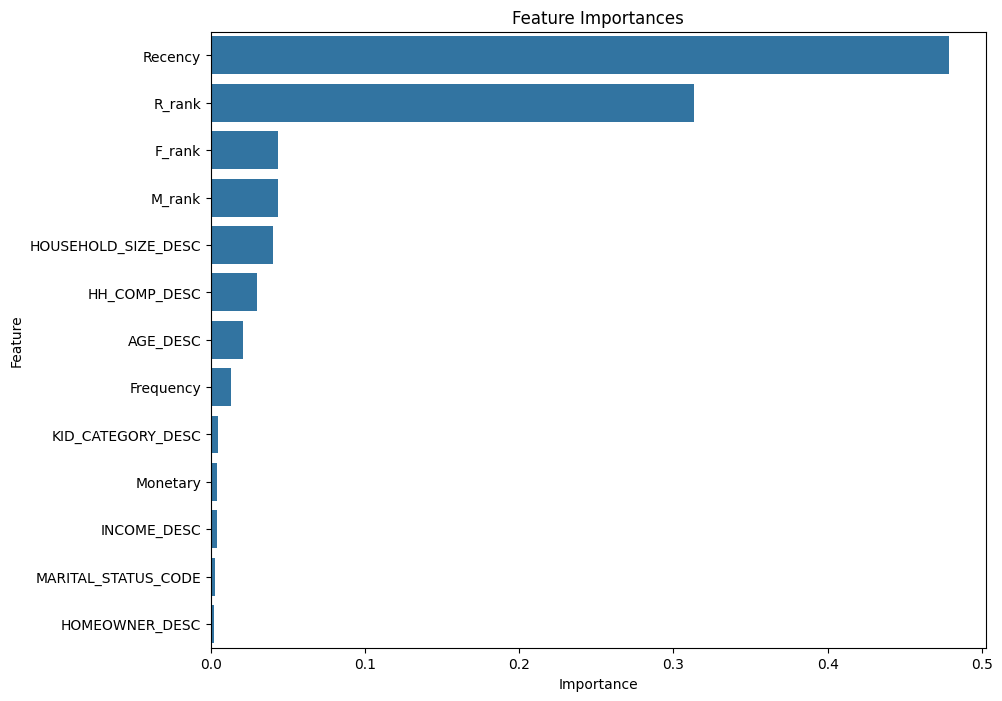

In [45]:
# Feature Importance
importances = best_rf.feature_importances_
feature_names = X.columns

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.show()

# Gradient Boosting Classifier

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np

# Define the parameter grid for GradientBoosting
gb_param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5]
}

# Create and fit GradientBoostingClassifier with RandomizedSearchCV
print("Processing GradientBoostingClassifier...")
try:
    gb_random_search = RandomizedSearchCV(
        estimator=GradientBoostingClassifier(),
        param_distributions=gb_param_grid,
        n_iter=10,
        cv=5,
        verbose=2,
        random_state=42,
        n_jobs=2
    )
    gb_random_search.fit(X_train_resampled, y_train_resampled)

    # Test the best model
    y_pred_gb = gb_random_search.best_estimator_.predict(X_test)
    gb_accuracy = np.mean(y_pred_gb == y_test)
    
    # Store results
    gb_results = {
        'Model': 'GradientBoostingClassifier',
        'Best Params': gb_random_search.best_params_,
        'Best Score': gb_random_search.best_score_,
        'Test Accuracy': gb_accuracy,
        'Classification Report': classification_report(y_test, y_pred_gb),
        'Confusion Matrix': confusion_matrix(y_test, y_pred_gb)
    }
except Exception as e:
    print(f"Error during GradientBoostingClassifier fitting: {e}")

# Convert results to DataFrame
gb_results_df = pd.DataFrame([gb_results])


Processing GradientBoostingClassifier...
Fitting 5 folds for each of 8 candidates, totalling 40 fits


# Logistic Regression

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np

# Define the parameter grid for LogisticRegression
lr_param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs', 'liblinear']
}

# Create and fit LogisticRegression with RandomizedSearchCV
print("Processing LogisticRegression...")
try:
    lr_random_search = RandomizedSearchCV(
        estimator=LogisticRegression(max_iter=1000),
        param_distributions=lr_param_grid,
        n_iter=10,
        cv=5,
        verbose=2,
        random_state=42,
        n_jobs=2
    )
    lr_random_search.fit(X_train_resampled, y_train_resampled)

    # Test the best model
    y_pred_lr = lr_random_search.best_estimator_.predict(X_test)
    lr_accuracy = np.mean(y_pred_lr == y_test)
    
    # Store results
    lr_results = {
        'Model': 'LogisticRegression',
        'Best Params': lr_random_search.best_params_,
        'Best Score': lr_random_search.best_score_,
        'Test Accuracy': lr_accuracy,
        'Classification Report': classification_report(y_test, y_pred_lr),
        'Confusion Matrix': confusion_matrix(y_test, y_pred_lr)
    }
except Exception as e:
    print(f"Error during LogisticRegression fitting: {e}")

# Convert results to DataFrame
lr_results_df = pd.DataFrame([lr_results])


Processing LogisticRegression...
Fitting 5 folds for each of 6 candidates, totalling 30 fits


# SVC

In [48]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import numpy as np

# Define the parameter grid for SVC
svc_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

# Create and fit SVC with RandomizedSearchCV
print("Processing SVC...")
try:
    svc_random_search = RandomizedSearchCV(
        estimator=SVC(),
        param_distributions=svc_param_grid,
        n_iter=10,
        cv=5,
        verbose=2,
        random_state=42,
        n_jobs=2
    )
    svc_random_search.fit(X_train_resampled, y_train_resampled)

    # Test the best model
    y_pred_svc = svc_random_search.best_estimator_.predict(X_test)
    svc_accuracy = np.mean(y_pred_svc == y_test)
    
    # Store results
    svc_results = {
        'Model': 'SVC',
        'Best Params': svc_random_search.best_params_,
        'Best Score': svc_random_search.best_score_,
        'Test Accuracy': svc_accuracy,
        'Classification Report': classification_report(y_test, y_pred_svc),
        'Confusion Matrix': confusion_matrix(y_test, y_pred_svc)
    }
except Exception as e:
    print(f"Error during SVC fitting: {e}")

# Convert results to DataFrame
svc_results_df = pd.DataFrame([svc_results])


Processing SVC...
Fitting 5 folds for each of 6 candidates, totalling 30 fits


# Model Comparison

In [49]:
# Combine results from all models
all_results_df = pd.concat([svc_results_df, lr_results_df, gb_results_df], ignore_index=True)

# Print results
for index, row in all_results_df.iterrows():
    print(f"Model: {row['Model']}")
    print(f"Best Parameters: {row['Best Params']}")
    print(f"Best Cross-Validation Score: {row['Best Score']}")
    print(f"Test Accuracy: {row['Test Accuracy']}")
    print("Classification Report:")
    print(row['Classification Report'])
    print("Confusion Matrix:")
    print(row['Confusion Matrix'])
    print("\n")


Model: SVC
Best Parameters: {'kernel': 'linear', 'C': 10}
Best Cross-Validation Score: 0.9962616822429908
Test Accuracy: 0.995850622406639
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       231
           1       1.00      0.90      0.95        10

    accuracy                           1.00       241
   macro avg       1.00      0.95      0.97       241
weighted avg       1.00      1.00      1.00       241

Confusion Matrix:
[[231   0]
 [  1   9]]


Model: LogisticRegression
Best Parameters: {'solver': 'lbfgs', 'C': 0.1}
Best Cross-Validation Score: 0.994392523364486
Test Accuracy: 0.991701244813278
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       231
           1       0.83      1.00      0.91        10

    accuracy                           0.99       241
   macro avg       0.92      1.00      0.95       241
weighted avg       0